In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

2023-08-27 18:37:27.355941: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-08-27 18:37:27.430265: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-08-27 18:37:27.431322: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-27 18:37:29.119408: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
points_n = 200
clusters_n = 3
iteration_n = 100
seed = 123
np.random.seed(seed)
tf.random.set_seed(seed)

In [3]:
points = np.random.uniform(0, 10, (points_n, 2))
centroids = tf.slice(tf.random.shuffle(points), [0, 0], [clusters_n, -1])

2023-08-27 18:37:30.817594: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1960] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


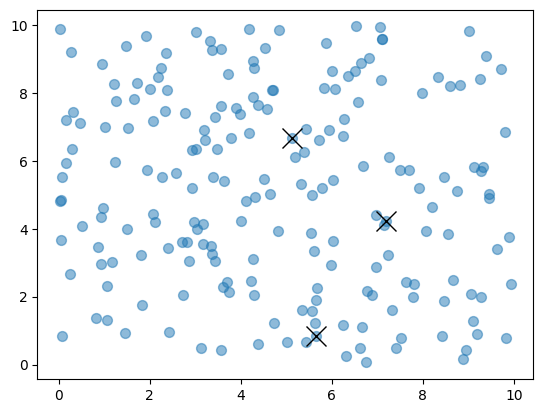

In [4]:
plt.scatter(points[:, 0], points[:, 1], s=50, alpha=0.5)
plt.plot(centroids[:, 0], centroids[:, 1], 'kx', markersize=15)
plt.show()

In [5]:
def closest_centroids(points, centroids):
    distances = tf.reduce_sum(tf.square(tf.subtract(points, centroids[:, None])), 2)
    assignments = tf.argmin(distances, 0)
    return assignments

In [6]:
def move_centroids(points, closest, centroids):
    return np.array([points[closest==k].mean(axis=0) for k in range(centroids.shape[0])])

In [7]:
for step in range(iteration_n):
    closest = closest_centroids(points, centroids)
    centroids = move_centroids(points, closest, centroids)

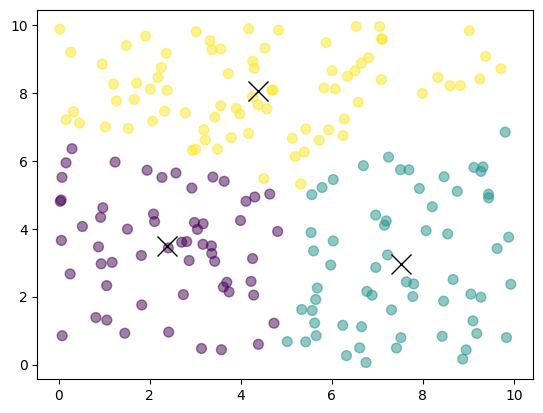

In [8]:
plt.scatter(points[:, 0], points[:, 1], c=closest, s=50, alpha=0.5)
plt.plot(centroids[:, 0], centroids[:, 1], 'kx', markersize=15)
plt.show()

In [9]:
def sse(points, centroids):
    sse1 = tf.reduce_sum(tf.square(tf.subtract(points, centroids[:,None])), 2).numpy()
    s = np.argmin(sse1, 0)
    distance = 0
    for i in range(len(points)):
      distance += sse1[s[i], i]

    return distance/len(points)

15.674727847309741
9.440950298957377
6.002530407614991
3.953631701951466
3.467588689755412
2.856426378718823
2.50547297512332
2.299865933961323
1.8778264270233018
1.5543296165525873


Text(0.5, 0, 'Number of clusters')

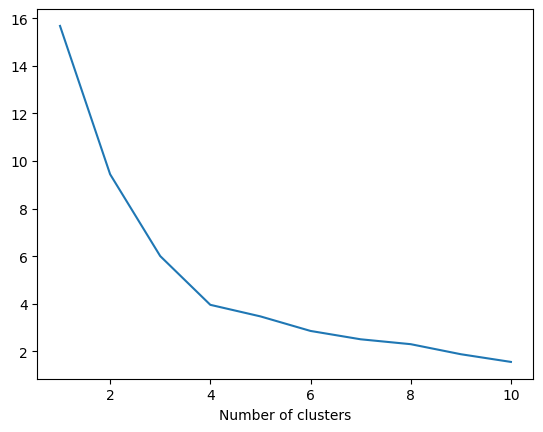

In [10]:
w_sse = []
for n in range(1, 11):
  centroids = tf.slice(tf.random.shuffle(points), [0, 0], [n, -1])
  for step in range(iteration_n):
    closest = closest_centroids(points, centroids)
    centroids = move_centroids(points, closest, centroids)
  print(sse(points, centroids))
  w_sse.append(sse(points, centroids))
plt.plot(range(1, 11),w_sse) 
plt.xlabel('Number of clusters') 

---